# LowCarb thorax disease classification in Flower

In [ ]:
!cp -r /content/drive/MyDrive/carbonhack22/openapi_client /content/

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:WU7VRTExDtjZKzXq8eIMqUJ3WbpUDtM38XVRxzDxYgQ root@13ea810ed33d
The key's randomart image is:
+---[RSA 4096]----+
|            E+B%X|
|           o ++BB|
|          o . =.O|
|         = o O =.|
|        S . @ = .|
|       . . B + . |
|      . . + = .  |
|       . . . o   |
|        .        |
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-2f5f2727


In [5]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCy+5Yo8bJ9ABCHGQ7tDmVPNDWeAX0+EU7XvQYBaTGkSpFkEmbH6TCLyZNxK8Y9G+a8kusbJxdoX3p0w8lV0K/9NTa8AVGX3vA95Yq29rKgY6dnLvhd4/OogEcG8rp6SvO5UjWZJtXgwhwSKhz/ukFATMz07LbqzdpFQRs0llZdLZbPjBdNTQJXl7qWrDXb2UtWVc6hOt5hZnEN3Hc3T6lMTOqOl/JkWphTBK/hDn5qeAqzcoZgzeDdNwMKiX6sspX73gQWIVr3J/RfnXj+DDilUrM2VNC4rlnyGv65/Akrr0pA7+jHnjmf9epuZIe61FO7gZuxQVTTsRPKyFShlLkXsYV8nOK5lIFO+OIJ7l3SpmC0KKWTIDzfeClxTR+eKH1hU1E2XYwExy0lnfdqXtqZDLbeCLrqfKHmGJgOxpWsGbcL4j/KWykGXt3D/lToVqavTaaQ/viZ/Hn6oiZ12ACRVDM395sDF3CDJDu0zyId3ZY3cYqxxjq9M5VRw1xAFVAr3Hh8O3u1BY2/3rno9ouVL/qm8uRgX3xtSrrU36VvjontPiNQ6WgFFePNkOQ4xcZsbxV4iJMOBHXUKaBoQL3MA+W0sJxpXKM45kp5YzXaFV5lfrqMIa1FzCbjl+Hx4oBMcBZVrP+c4Yls2XFnMWjqDtlQ/AL3tP8GmSBOnv8NFQ== root@13ea810ed33d


In [6]:
!git clone git@github.com:birnbaum/carbonhack22.git

Cloning into 'carbonhack22'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 321 (delta 158), reused 259 (delta 96), pack-reused 0
Receiving objects: 100% (321/321), 1.22 MiB | 1.06 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [1]:
%cd carbonhack22

/content/carbonhack22


In [8]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./carbon_sdk_client
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 8.8 MB 35.2 MB/s 
     |████████████████████████████████| 90 kB 10.7 MB/s 
     |████████████████████████████████| 140 kB 90.6 MB/s 
     |████████████████████████████████| 423 kB 68.4 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 346 kB 87.8 MB/s 
     |████████████████████████████████| 9.8 MB 37.4 MB/s 
     |████████████████████████████████| 271 kB 80.9 MB/s 
     |███████

In [22]:
%cd ..

/content


In [23]:
!ls

carbonhack22  data.zip	drive  openapi_client  sample_data


## Check GPU availability

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Oct 24 12:37:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Create dirs, get data 

In [24]:
!mkdir NIH
!mkdir /root/.kaggle/

### Copy Kaggle API-key to created directory at '/root/.kaggle'

In [12]:
!cp '/content/drive/MyDrive/professional/Research_Jobs/UMI/projects/APIs/kaggle.json' '/root/.kaggle'

In [13]:
!kaggle datasets download -d nih-chest-xrays/data

100% 42.0G/42.0G [11:09<00:00, 63.4MB/s]
100% 42.0G/42.0G [11:09<00:00, 67.3MB/s]


In [25]:
!unzip -q '/content/data.zip' -d '/content/NIH/'

## Install packages

In [22]:
!pip install flwr[simulation]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54.5 MB 1.2 MB/s 
     |████████████████████████████████| 8.8 MB 73.1 MB/s 
     |████████████████████████████████| 4.1 MB 91.9 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 128 kB 55.7 MB/s 
     |████████████████████████████████| 90 kB 10.9 MB/s 
     |████████████████████████████████| 3.0 MB 76.9 MB/s 
     |████████████████████████████████| 201 kB 101.4 MB/s 
     |████████████████████████████████| 291 kB 93.9 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 468 kB 75.4 MB/s 
  Created wheel for gpustat: filename=gpustat-1.0.0-py3-none-any.whl size=19889 sha256=8cdf90e8a5fe81002a75f0aefd1d71aa0f4ba18ee374232dcf1ec82da11e25f9
  Stored in directory: /root/.cache/pip/wheels/d2/31/5c/eb69af6e2285e7d6ec8d7dc26435be7c81c6ad22c45efdcca7
Successf

## Imports

In [1]:
%cd carbonhack22

/content/carbonhack22


In [27]:
import os
import sys
import math
import time
from glob import glob
from PIL import Image
from collections import OrderedDict
from typing import Dict, List, Optional, Tuple

import flwr as fl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nnqunt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision import transforms as T, models

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {DEVICE}")

Training on cuda:0


## Data

### Preprocess

In [55]:
root_img_dir = '/content/NIH/'

In [56]:
all_xray_df = pd.read_csv(
    os.path.join(
        root_img_dir,
        'Data_Entry_2017.csv'
        )
    )

all_image_paths = {
    os.path.basename(x): x for x in 
    glob(os.path.join(root_img_dir, 'images*', '*', '*.png'))
    }

print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
# all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))

all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
48941,00012406_001.png,No Finding,1,12406,46,F,PA,2500,2048,0.168,0.168,NaN,/content/NIH/images_006/images/00012406_001.png
70498,00017386_001.png,Infiltration,1,17386,32,M,PA,2992,2991,0.143,0.143,NaN,/content/NIH/images_008/images/00017386_001.png
53925,00013608_006.png,Effusion|Nodule,6,13608,16,M,PA,2538,2991,0.143,0.143,NaN,/content/NIH/images_006/images/00013608_006.png


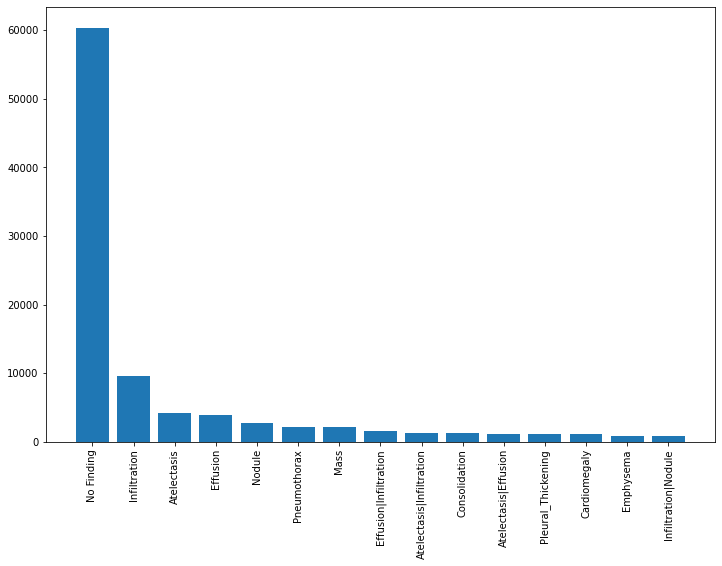

In [57]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [58]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
49522,00012573_012.png,,12,12573,18,F,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82952,00020398_014.png,Infiltration|Mass,14,20398,21,F,PA,2544,3056,0.139000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
87581,00021631_000.png,,0,21631,24,M,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [
    c_label for c_label in all_labels if all_xray_df[c_label].sum() > MIN_CASES
    ]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


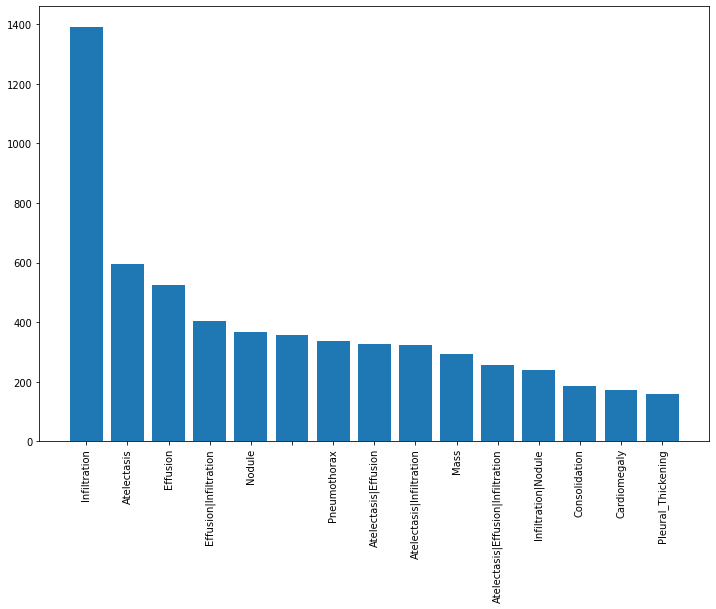

In [60]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()

num_data_points = 11000
#num_data_points = 112120

all_xray_df = all_xray_df.sample(num_data_points, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

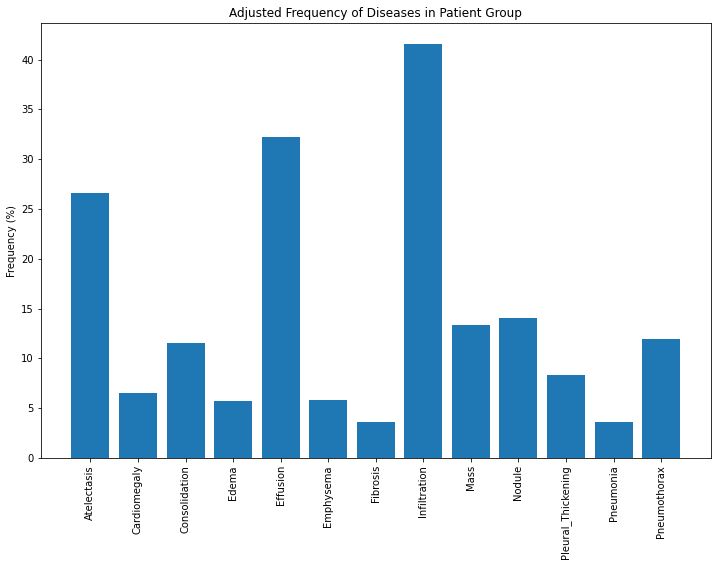

In [61]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [62]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [63]:
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec
72026,00017738_000.png,Emphysema,0,17738,54,M,PA,2618,2991,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
45913,00011752_021.png,Emphysema,21,11752,35,M,PA,2992,2991,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
63570,00015685_003.png,Emphysema|Mass,3,15685,76,F,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."


In [64]:
len(all_xray_df)

11000

### Get DataLoaders

In [65]:
class NIH_Dataset(Dataset):
  def __init__(
    self, 
    data_df,
    transform=None
    ):
    self.data_df = data_df
    self.transform = transform 

  def __len__(
    self
    ):
    return len(self.data_df)

  def __getitem__(
    self, 
    idx
    ):
    img_file = self.data_df['path'].iloc[idx]
    img = Image.open(img_file).convert('RGB')
    label = np.array(self.data_df.iloc[:,-1].iloc[idx], dtype=float)
    if self.transform:
        img = self.transform(img)

    return img, label

def get_data_loaders(
    data_df: pd.DataFrame,
    global_train_frac: float = 0.8,
    local_train_frac: float = 0.8,
    batch_size: int = 32,
    num_clients: int = 10
    ):
  train_data_transform = T.Compose([
    T.RandomRotation((-20,+20)),
    # T.Resize((512,512)),
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
                ])

  test_data_transform = T.Compose([
    T.Resize((512,512)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
                ])
  
  train_df, test_df = train_test_split(
      data_df,
      test_size = 1 - global_train_frac,
      random_state = 42,
      stratify = data_df['Finding Labels'].map( lambda x: x[:4])
  )

  trainset = NIH_Dataset(
      train_df,
      transform = train_data_transform
      )
  
  testset = NIH_Dataset(
      test_df,
      transform = test_data_transform
      )

  # Split training set into `num_clients` partitions to simulate different local datasets
  partition_size = len(trainset) // num_clients
  lengths = [partition_size] * num_clients
  lengths[-1] += len(trainset) - np.sum(lengths)
  datasets = random_split(trainset, lengths, torch.Generator().manual_seed(42))

  # Split each partition into train/val and create DataLoader
  trainloaders = []
  valloaders = []
  for ds in datasets:      
      len_train = math.ceil(len(ds) * local_train_frac)
      len_val = len(ds) - math.ceil(len(ds) * local_train_frac)
      lengths = [len_train, len_val]
      ds_train, ds_val = random_split(ds, lengths, torch.Generator().manual_seed(42))
      trainloaders.append(DataLoader(ds_train, batch_size=batch_size, shuffle=True, drop_last = True))
      valloaders.append(DataLoader(ds_val, batch_size=batch_size, drop_last = True))
  testloader = DataLoader(testset, batch_size=batch_size)

  return trainloaders, valloaders, testloader

def inv_data_transform(img):
    img = img.permute(1,2,0)
    img = img * torch.Tensor([0.229, 0.224, 0.225]) + torch.Tensor([0.485, 0.456, 0.406])
    return img

In [67]:
num_clients = 10

trainloaders, valloaders, testloader = get_data_loaders(
    all_xray_df,
    global_train_frac = 0.95,
    local_train_frac = 0.9,
    num_clients = num_clients,
    batch_size = 25
)

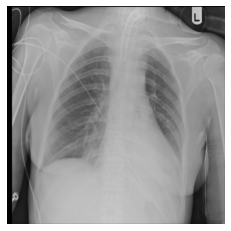

In [68]:
plt.imshow(
    inv_data_transform(
        testloader.dataset[0][0]
    )
)
plt.axis('off');

In [69]:
len(trainloaders[0].dataset), len(valloaders[0].dataset) ,len(testloader.dataset)

(940, 104, 551)

In [70]:
len(all_labels)

13

### Lowcarb client

In [71]:
class Lowcarb_Client(object):
    def __init__(self, *args, **kwargs):
        super(Lowcarb_Client, self).__init__(*args, **kwargs)
        self.location = None

    def get_properties(self, config):
        return {'location': self.location}

def lowcarb(func):
    def wrapper(*args):
        properties = func(*args)
        properties['location'] = args[0].location

        return properties

    return wrapper

### Lowcarb client manager 

In [72]:
from logging import INFO
from typing import Dict, List, Optional
import random

import pandas as pd
from flwr.common.logger import log

import flwr as fl
from flwr.server.client_manager import ClientManager
from flwr.server.criterion import Criterion
from flwr.server.client_proxy import ClientProxy

import requests
from pandas import DataFrame
from ray.exceptions import RaySystemError

from backtest.strategy import CarbonAwareStrategy

from lowcarb.carbon_sdk_webapi import CarbonSDK_WebAPI

import numpy as np

class Object(object):
    pass

class LowCarb_ClientManager(fl.server.client_manager.SimpleClientManager):
    '''
    Implementation of lowcarbs ClientManager, which is a simple extension of flower's own standard SimpleClientManager.
    lowcarb achieves carbon aware federated learning by implementing the sample() method to select clients in a way to minmize the carbon foodprint while maintaining net integrity.
    '''
    def __init__(self, api_host, workload_duration=15, forecast_window=12, **kargs):
        super(LowCarb_ClientManager, self).__init__(**kargs)
        self.host = api_host
        self.api = CarbonSDK_WebAPI(self.host)
        self.workload_duration = workload_duration
        self.forecast_window = forecast_window

        self.client_participation: dict[str: int] = {}

    def sample(
            self,
            num_clients: int,
            min_num_clients: Optional[int] = None,
            criterion: Optional[Criterion] = None,
    ) -> List[ClientProxy]:

        ##### each sample round add any new client to the participitation DataFrame
        for cid in list(self.clients.keys()):
            if not (cid in self.client_participation.keys()):
                self.client_participation[cid] = 0


        """Sample a number of Flower ClientProxy instances."""
        # Block until at least num_clients are connected.
        if min_num_clients is None:
            min_num_clients = num_clients
        self.wait_for(min_num_clients)
        # Sample clients which meet the criterion
        available_cids = list(self.clients)
        if criterion is not None:
            available_cids = [
                cid for cid in available_cids if criterion.select(self.clients[cid])
            ]

        if num_clients > len(available_cids):
            log(
                INFO,
                "Sampling failed: number of available clients"
                " (%s) is less than number of requested clients (%s).",
                len(available_cids),
                num_clients,
            )
            return []

        # sampled_cids = random.sample(available_cids, num_clients)

        # data for the strategy to select the next best clients
        client_locations = self._get_client_locations()
        present_locations = pd.Series(client_locations.values()).unique()
        forecasts = self._get_location_forecasts(present_locations)

        available_cids_participation = {cid: self.client_participation[cid] for cid in available_cids}

        strategy = CarbonAwareStrategy(clients_per_round=num_clients, max_forecast_duration=self.forecast_window)
        selected_clients = strategy.select(forecasts=forecasts, past_participation=available_cids_participation, client_location_map=client_locations)

        forecasts

        for client in selected_clients:
            self.client_participation[client] = self.client_participation[client] + 1


        print('_______________________________________________________________________\n Available Clients with their locations\n_______________________________________________________________________')
        for client, location in client_locations.items():
            print(f'{client} {location}')

        print('_______________________________________________________________________\n Available Clients with their participation\n_______________________________________________________________________')
        for client, participation in available_cids_participation.items():
            print(f'{client} {participation}')

        print('_______________________________________________________________________\n selected low carbon clients\n_______________________________________________________________________')
        for client in selected_clients:
            print(f'{client}')

        return [self.clients[cid] for cid in selected_clients]

        # return [self.clients[cid] for cid in sampled_cids]

    def _get_client_locations(self) -> Dict[str, str]:
        '''
        Fetches all the clients' location and puts it in a DataFrame
        :return: pandas Dataframe with 'cid' and 'location' column
        '''
        client_props = []
        for cid, client in self.clients.items():
            Ins = Object()  ##### weird hack for gRPC, I guess the Ins for get_properties are missing in flwr
            Ins.config = {'config_value': 'config_sample_value'}
            try:
                client_prop = client.get_properties(ins=Ins, timeout=500)
                client_prop.properties.update({'cid': cid})
                client_props.append(client_prop.properties)
            except RaySystemError as error:
                print(error)


        location_df = pd.DataFrame({
            'cid': [client_prop['cid'] for client_prop in client_props],
            'location': [client_prop['location'] for client_prop in client_props]
        })

        client_locations = {client['cid']: client['location'] for i, client in
                                location_df.iterrows()}

        return client_locations

    def _get_location_forecasts(self, locations) -> Dict[str, list]:
        forecasts_response = self.api.get_forecast_batch(locations, windowSize=self.workload_duration, forecast_window=self.forecast_window)
        forecasts = {region: forecast['value'].to_list() for region, forecast in forecasts_response.groupby('region')}
        return forecasts

### FL utils basic

In [73]:
class FlowerClient(Lowcarb_Client, fl.client.NumPyClient):
    def __init__(self, net, trainloader, valloader, location, *args, **kwargs):
        super(FlowerClient, self).__init__(*args, **kwargs)
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

        self.location = location

    def get_parameters(self, config):
        print(f"[Client {self.cid}] get_parameters")
        return get_parameters(self.net)

    def fit(self, parameters, config):
        # Read values from config
        # server_round = config["server_round"]
        # local_epochs = config["local_epochs"]
        local_epochs = 30

        # Use values provided by the config
        # print(f"[Client {self.cid}, round {server_round}] fit, config: {config}")
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=local_epochs)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        print(f"[Client {self.cid}] evaluate, config: {config}")
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

def set_parameters(net, parameters: List[np.ndarray]):
    # print('Entered set params function')
    params_dict = zip(net.state_dict().keys(), parameters)
    # print('Created params dict')
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    # print('Created state dict')
    # print([k for k in state_dict.keys()])
    # print([k for k in net.state_dict().keys()])
    try:
      net.load_state_dict(state_dict, strict=True)
      print('Finished loading model weights')
    except:
      print('Failed to load state dict')

### FL training utils

In [74]:
def compute_class_freqs(labels):

    labels = np.array(labels)
    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

def weighted_loss(pos_weights, neg_weights, y_pred, y_true, epsilon = 1e-7):
    y_pred = torch.sigmoid(y_pred)
    loss = 0.0
    for i in range(len(pos_weights)):
        loss_pos = -1 * torch.mean(pos_weights[i] * y_true[:,i] * torch.log(y_pred[:,i] + epsilon))
        loss_neg = -1 * torch.mean(neg_weights[i] * (1-y_true[:,i]) * torch.log((1-y_pred[:,i]) + epsilon))
        loss += loss_pos + loss_neg
    return loss

def train(
    net,
    trainloader,
    epochs
    ):
    print(f'Entered train function, total num. of epochs: {epochs}')
    # ToDo: Class weights should be different for each client
    freq_pos, freq_neg = compute_class_freqs(all_xray_df.iloc[:,-1])    
    pos_weights = freq_neg
    neg_weights = freq_pos

    valid_loss_min = np.Inf
    optimizer = torch.optim.Adam(
        net.parameters(),
        lr = 1e-4
        )
    start_time = time.time()
    for i in range(epochs):
        train_loss = 0.0
        valid_loss = 0.0
        train_acc = 0.0
        valid_acc = 0.0 
        net.train()
        for j, (images, labels) in enumerate(trainloader):
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            ps = net(images)
            
            loss = weighted_loss(pos_weights, neg_weights, ps, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_train_loss = train_loss / len(trainloader)
        print("Epoch : {} Train Loss : {:.6f} ".format(i+1,avg_train_loss))
    end_time = time.time()
    time_delta = end_time - start_time
    print('\n')
    print(f'Time to complete local training round: {time_delta}')
    print('\n')

def test(net, testloader, pathology_list):
    
    # ToDo: Class weights should be different for each client
    freq_pos, freq_neg = compute_class_freqs(all_xray_df.iloc[:,-1])    
    pos_weights = freq_neg
    neg_weights = freq_pos

    per_class_accuracy = [0 for i in range(len(pathology_list))]
    total = 0.0
    loss = 0.0
    with torch.no_grad():
        for images,labels in testloader:
            ps = net(images.to(DEVICE))
            labels = labels.to(DEVICE)
            loss += weighted_loss( pos_weights, neg_weights, ps, labels)
            ps = (ps >= 0.5).float()

            for i in range(ps.shape[1]):
                x1 = ps[:,i:i+1]
                x2 = labels[:,i:i+1]
                per_class_accuracy[i] += int((x1 == x2).sum())

        per_class_accuracy = [(i/len(testloader.dataset)) * 100.0 for i in per_class_accuracy]

    return loss, np.mean(per_class_accuracy)

def get_acc_data(
    class_names,
    acc_list
    ):
    df = pd.DataFrame(list(zip(class_names, acc_list)), columns =['Labels', 'Class Acc.']) 
    return df

In [75]:
def server_eval(
    server_round: int,
    parameters: fl.common.NDArrays, 
    config: Dict[str, fl.common.Scalar]
    ):
    # ToDo: Class weights should be different for each client
    freq_pos, freq_neg = compute_class_freqs(all_xray_df.iloc[:,-1])    
    pos_weights = freq_neg
    neg_weights = freq_pos

    net = init_net().to(DEVICE)

    set_parameters(net, parameters)  # Update model with the latest parameters

    per_class_accuracy = [0 for i in range(len(all_labels))]
    total = 0.0
    loss = 0.0
    with torch.no_grad():
        for images,labels in testloader:
          
            ps = net(images.to(DEVICE))
            labels = labels.to(DEVICE)
            ps = torch.sigmoid(ps)
            ps = (ps >= 0.5).float()
            loss += weighted_loss( pos_weights, neg_weights, ps, labels)

            for i in range(ps.shape[1]):
                x1 = ps[:,i:i+1]
                x2 = labels[:,i:i+1]
                per_class_accuracy[i] += int((x1 == x2).sum())

        per_class_accuracy = [(i/len(testloader.dataset))*100.0 for i in per_class_accuracy]

    test_df = get_acc_data(all_labels, per_class_accuracy)
    print('\nServer eval')
    print(test_df)
    print('\n')

    return loss,  {"mean_class_acc.": np.mean(per_class_accuracy)}

## Training

In [76]:
from random import sample
def init_net():
  net = models.vgg11(
    # weights="IMAGENET1K_V1"
    weights=None
  )
  net.classifier[-1] = torch.nn.Linear(
      net.classifier[-1].in_features,
      len(all_labels)
  )
  # net = models.resnet18(
  #   weights="IMAGENET1K_V1"
  # )
  # net.fc = torch.nn.Linear(
  #     net.fc.in_features,
  #     len(all_labels)
  # )
  return net

available_regions = ['westcentralus', 'ukwest', 'uksouth', 'westeurope', 'westus', 'australiacentral', 'australiaeast', 'swedencentral', 'norwaywest', 'norwayeast', 'northeurope', 'centralus', 'francesouth', 'francecentral']
regions = [sample(available_regions, 1)[0] for i in range(0, num_clients)]

def client_fn(cid: str) -> FlowerClient:
    """Create a Flower client representing a single organization."""

    # Load model
    net = init_net().to(DEVICE)

    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]
    print(f'Created client: {cid}')

    return FlowerClient(net, trainloader, valloader, regions[int(cid)])

### 35 local epochs take approx 15min. on A100 for each client and 30 local epochs on Tesla T4 

In [77]:
num_clients

10

In [78]:
num_rounds = 10
local_epochs = 30
fraction_fit = 0.01
fraction_evaluate = 0.01
min_fit_clients = 1
min_evaluate_clients = 1

client_resources = {
    "num_cpus": 1,
    "num_gpus": 1
    }

# def fit_config(server_round: int):    
#     config = {
#         "server_round": server_round,
#         "local_epochs": local_epochs,
#     }
#     return config

# Create an instance of the model and get the parameters
net = init_net()
params = get_parameters(init_net())

# Pass parameters to the Strategy for server-side parameter initialization
strategy = fl.server.strategy.FedAvg(
    fraction_fit=fraction_fit,
    fraction_evaluate=fraction_evaluate,
    min_fit_clients=min_fit_clients,
    min_evaluate_clients=min_evaluate_clients,
    min_available_clients=num_clients,
    initial_parameters=fl.common.ndarrays_to_parameters(params),
    # evaluate_fn=server_eval,
    # on_fit_config_fn=fit_config,
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=num_rounds),
    client_resources=client_resources,
    client_manager=LowCarb_ClientManager(api_host='https://carbon-aware-api.azurewebsites.net', workload_duration=15, forecast_window=12),
    strategy=strategy,
)

INFO flower 2022-10-24 13:41:58,559 | app.py:145 | Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
INFO:flower:Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
INFO flower 2022-10-24 13:42:01,494 | app.py:179 | Flower VCE: Ray initialized with resources: {'GPU': 1.0, 'CPU': 8.0, 'node:172.28.0.2': 1.0, 'memory': 32664330240.0, 'accelerator_type:T4': 1.0, 'object_store_memory': 16332165120.0}
INFO:flower:Flower VCE: Ray initialized with resources: {'GPU': 1.0, 'CPU': 8.0, 'node:172.28.0.2': 1.0, 'memory': 32664330240.0, 'accelerator_type:T4': 1.0, 'object_store_memory': 16332165120.0}
INFO flower 2022-10-24 13:42:01,497 | server.py:86 | Initializing global parameters
INFO:flower:Initializing global parameters
INFO flower 2022-10-24 13:42:01,502 | server.py:266 | Using initial parameters provided by strategy
INFO:flower:Using initial parameters provided by strategy
INFO flower 2022-10-24 13:42:01,505 | server.py:88 | 

(launch_and_get_properties pid=27251) Created client: 0
(launch_and_get_properties pid=27299) Created client: 1
(launch_and_get_properties pid=27346) Created client: 2
(launch_and_get_properties pid=27393) Created client: 3
(launch_and_get_properties pid=27438) Created client: 4
(launch_and_get_properties pid=27485) Created client: 5
(launch_and_get_properties pid=27530) Created client: 6
(launch_and_get_properties pid=27577) Created client: 7
(launch_and_get_properties pid=27622) Created client: 8
(launch_and_get_properties pid=27669) Created client: 9


DEBUG flower 2022-10-24 13:43:03,138 | server.py:220 | fit_round 1: strategy sampled 1 clients (out of 10)
DEBUG:flower:fit_round 1: strategy sampled 1 clients (out of 10)


_______________________________________________________________________
 Available Clients with their locations
_______________________________________________________________________
0 norwayeast
1 uksouth
2 centralus
3 westus
4 norwaywest
5 francesouth
6 northeurope
7 norwaywest
8 swedencentral
9 australiacentral
_______________________________________________________________________
 Available Clients with their participation
_______________________________________________________________________
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
_______________________________________________________________________
 selected low carbon clients
_______________________________________________________________________
8
(launch_and_fit pid=27719) Created client: 8
(launch_and_fit pid=27719) Entered set params function
(launch_and_fit pid=27719) Created params dict
(launch_and_fit pid=27719) Created state dict
(launch_and_fit pid=27719) ['features.0.weight', 'features.0.bias', 'features.3.weight'

DEBUG flower 2022-10-24 13:57:59,399 | server.py:234 | fit_round 1 received 1 results and 0 failures
DEBUG:flower:fit_round 1 received 1 results and 0 failures
WARNING flower 2022-10-24 13:58:01,153 | fedavg.py:243 | No fit_metrics_aggregation_fn provided


(launch_and_get_properties pid=28183) Created client: 0
(launch_and_get_properties pid=28228) Created client: 1
(launch_and_get_properties pid=28275) Created client: 2
(launch_and_get_properties pid=28321) Created client: 3
(launch_and_get_properties pid=28368) Created client: 4
(launch_and_get_properties pid=28415) Created client: 5
(launch_and_get_properties pid=28462) Created client: 6
(launch_and_get_properties pid=28507) Created client: 7
(launch_and_get_properties pid=28554) Created client: 8
(launch_and_get_properties pid=28599) Created client: 9


DEBUG flower 2022-10-24 13:59:02,656 | server.py:170 | evaluate_round 1: strategy sampled 1 clients (out of 10)
DEBUG:flower:evaluate_round 1: strategy sampled 1 clients (out of 10)


_______________________________________________________________________
 Available Clients with their locations
_______________________________________________________________________
0 norwayeast
1 uksouth
2 centralus
3 westus
4 norwaywest
5 francesouth
6 northeurope
7 norwaywest
8 swedencentral
9 australiacentral
_______________________________________________________________________
 Available Clients with their participation
_______________________________________________________________________
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 1
9 0
_______________________________________________________________________
 selected low carbon clients
_______________________________________________________________________
5
(launch_and_evaluate pid=28649) Created client: 5


DEBUG flower 2022-10-24 13:59:09,291 | server.py:184 | evaluate_round 1 received 0 results and 1 failures
DEBUG:flower:evaluate_round 1 received 0 results and 1 failures


(launch_and_get_properties pid=28697) Created client: 0
(launch_and_get_properties pid=28742) Created client: 1
(launch_and_get_properties pid=28789) Created client: 2
(launch_and_get_properties pid=28836) Created client: 3
(launch_and_get_properties pid=28883) Created client: 4


KeyboardInterrupt: ignored